In [32]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt
import math

In [33]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2097cdcc80ba4cabb453151a56b106ae = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g2S5-HZo0If8MtXkeGVnPnf5RLj1BVeCuZIm4tibJvCm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_2097cdcc80ba4cabb453151a56b106ae.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-d1io5z70pqobln',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [34]:
df_data_1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [35]:
df_data_1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [36]:
df_data_1.shape

(2938, 22)

In [37]:
df_data_1.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [38]:
#Checking for missing values
df_data_1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [39]:
#Handling missing values
df_data_1 = df_data_1.interpolate(method="linear",limit_direction="forward")
df_data_1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [40]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_data_1["Country"] = lb_make.fit_transform(df_data_1["Country"])
df_data_1["Status"] = lb_make.fit_transform(df_data_1["Status"])
df_data_1.head(40)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.010,71.279624,65.0,1154,...,6.0,8.160,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.010,73.523582,62.0,492,...,58.0,8.180,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.010,73.219243,64.0,430,...,62.0,8.130,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.010,78.184215,67.0,2787,...,67.0,8.520,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.010,7.097109,68.0,3013,...,68.0,7.870,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,0,2010,1,58.8,279.0,74,0.010,79.679367,66.0,1989,...,66.0,9.200,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,0,2009,1,58.6,281.0,77,0.010,56.762217,63.0,2861,...,63.0,9.420,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,0,2008,1,58.1,287.0,80,0.030,25.873925,64.0,1599,...,64.0,8.330,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,0,2007,1,57.5,295.0,82,0.020,10.910156,63.0,1141,...,63.0,6.730,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,0,2006,1,57.3,295.0,84,0.030,17.171518,64.0,1990,...,58.0,7.430,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [41]:
#Finding and Detecting Outliers using Z-Score
z = np.abs(stats.zscore(df_data_1))
print(z)
threshold = 3
print(np.where(z > 3))
df_data_1 = df_data_1[(z < 3).all(axis=1)]

[[1.69104231 1.6217623  0.45939851 ... 2.73175989 0.74137957 0.59094031]
 [1.69104231 1.40498625 0.45939851 ... 2.77589328 0.75569475 0.62085876]
 [1.69104231 1.1882102  0.45939851 ... 2.82002667 0.7843251  0.65077721]
 ...
 [1.7231814  1.19632639 0.45939851 ... 0.79891123 0.98950927 0.62085876]
 [1.7231814  1.41310244 0.45939851 ... 0.71064445 0.98950927 0.68069566]
 [1.7231814  1.62987849 0.45939851 ... 1.38569153 0.9561072  0.68069566]]
(array([   0,    4,    5, ..., 2936, 2937, 2937]), array([12, 18, 18, ..., 15,  4, 15]))


In [42]:
df_data_1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,0,2014,1,59.9,271.0,64,0.010,73.523582,62.00,492,...,58.0,8.180,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.010,73.219243,64.00,430,...,62.0,8.130,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.010,78.184215,67.00,2787,...,67.0,8.520,67.0,0.1,669.959000,3.696958e+06,17.9,18.0,0.463,9.8
14,0,2001,1,55.3,316.0,88,0.010,10.574728,63.00,8762,...,35.0,7.800,33.0,0.1,117.496980,2.966463e+06,2.1,2.4,0.340,5.9
15,0,2000,1,54.8,321.0,88,0.010,10.424960,62.00,6532,...,24.0,8.200,24.0,0.1,114.560000,2.937560e+05,2.3,2.5,0.338,5.5
16,1,2015,1,77.8,74.0,0,4.600,364.975229,99.00,0,...,99.0,6.000,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
17,1,2014,1,77.5,8.0,0,4.510,428.749067,98.00,0,...,98.0,5.880,98.0,0.1,4575.763787,2.889140e+05,1.2,1.3,0.761,14.2
18,1,2013,1,77.2,84.0,0,4.760,430.876979,99.00,0,...,99.0,5.660,99.0,0.1,4414.723140,2.895920e+05,1.3,1.4,0.759,14.2
19,1,2012,1,76.9,86.0,0,5.140,412.443356,99.00,9,...,99.0,5.590,99.0,0.1,4247.614380,2.941000e+03,1.3,1.4,0.752,14.2
20,1,2011,1,76.6,88.0,0,5.370,437.062100,99.00,28,...,99.0,5.710,99.0,0.1,4437.178680,2.951950e+05,1.4,1.5,0.738,13.3


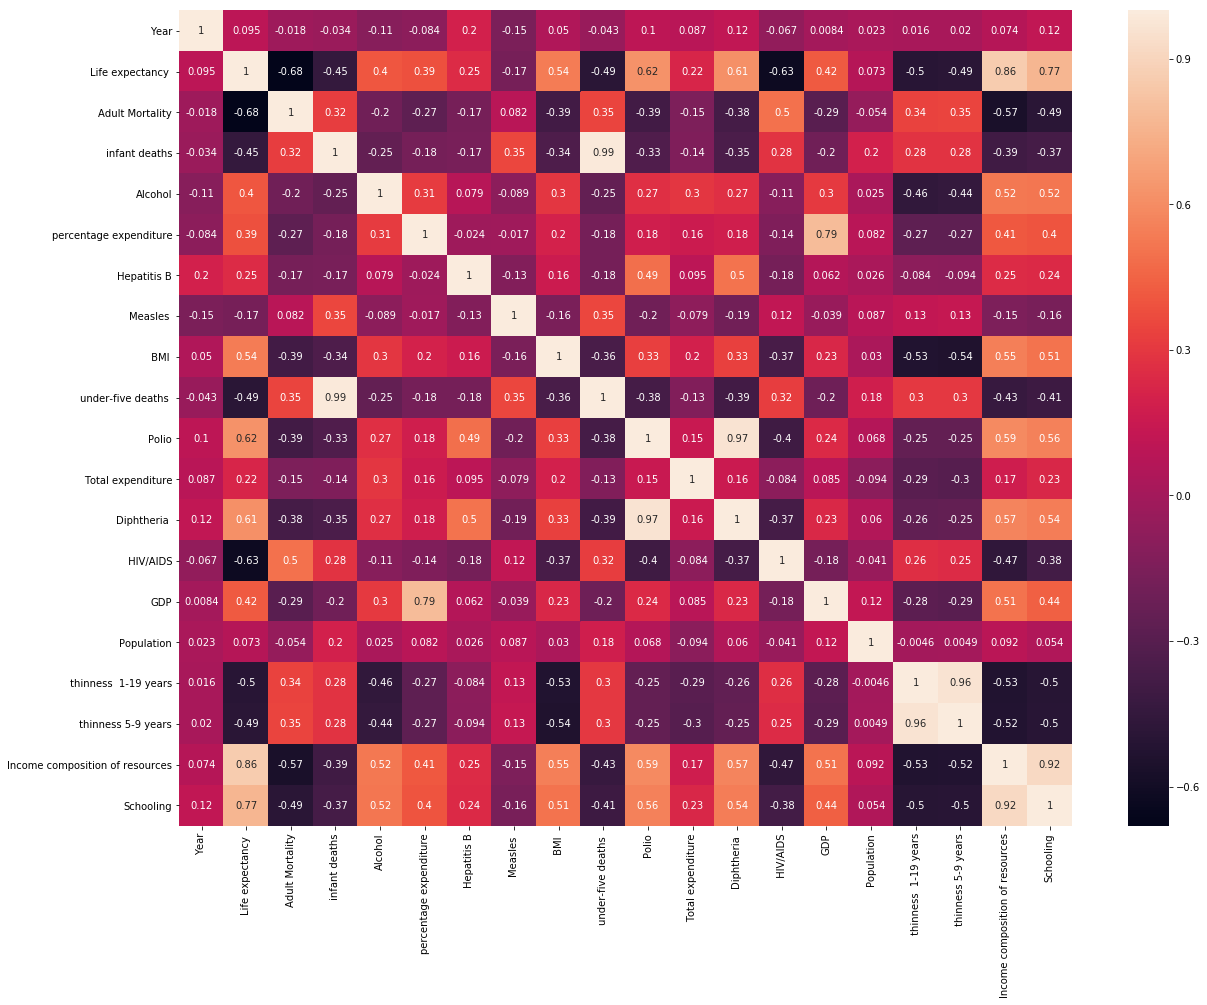

In [69]:
#Data Visualizing
plt.figure(figsize=(20,15))
sb.heatmap(df_data_1.corr(),annot = True)

In [44]:
#Dropping country and status coulumns from the dataset
df_data_1 = df_data_1.drop("Country",axis = 1)
df_data_1 = df_data_1.drop("Status",axis = 1)

In [45]:
df_data_1

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,2014,59.9,271.0,64,0.010,73.523582,62.00,492,18.6,86,58.0,8.180,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.010,73.219243,64.00,430,18.1,89,62.0,8.130,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.010,78.184215,67.00,2787,17.6,93,67.0,8.520,67.0,0.1,669.959000,3.696958e+06,17.9,18.0,0.463,9.8
14,2001,55.3,316.0,88,0.010,10.574728,63.00,8762,12.6,122,35.0,7.800,33.0,0.1,117.496980,2.966463e+06,2.1,2.4,0.340,5.9
15,2000,54.8,321.0,88,0.010,10.424960,62.00,6532,12.2,122,24.0,8.200,24.0,0.1,114.560000,2.937560e+05,2.3,2.5,0.338,5.5
16,2015,77.8,74.0,0,4.600,364.975229,99.00,0,58.0,0,99.0,6.000,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
17,2014,77.5,8.0,0,4.510,428.749067,98.00,0,57.2,1,98.0,5.880,98.0,0.1,4575.763787,2.889140e+05,1.2,1.3,0.761,14.2
18,2013,77.2,84.0,0,4.760,430.876979,99.00,0,56.5,1,99.0,5.660,99.0,0.1,4414.723140,2.895920e+05,1.3,1.4,0.759,14.2
19,2012,76.9,86.0,0,5.140,412.443356,99.00,9,55.8,1,99.0,5.590,99.0,0.1,4247.614380,2.941000e+03,1.3,1.4,0.752,14.2
20,2011,76.6,88.0,0,5.370,437.062100,99.00,28,55.1,1,99.0,5.710,99.0,0.1,4437.178680,2.951950e+05,1.4,1.5,0.738,13.3


In [72]:
#Dependent and Independent variables
x = df_data_1.iloc[:,df_data_1.columns != 'Life expectancy ']
y = df_data_1.iloc[:,1]

In [47]:
x

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,2014,271.0,64,0.010,73.523582,62.00,492,18.6,86,58.0,8.180,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.010,73.219243,64.00,430,18.1,89,62.0,8.130,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.010,78.184215,67.00,2787,17.6,93,67.0,8.520,67.0,0.1,669.959000,3.696958e+06,17.9,18.0,0.463,9.8
14,2001,316.0,88,0.010,10.574728,63.00,8762,12.6,122,35.0,7.800,33.0,0.1,117.496980,2.966463e+06,2.1,2.4,0.340,5.9
15,2000,321.0,88,0.010,10.424960,62.00,6532,12.2,122,24.0,8.200,24.0,0.1,114.560000,2.937560e+05,2.3,2.5,0.338,5.5
16,2015,74.0,0,4.600,364.975229,99.00,0,58.0,0,99.0,6.000,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
17,2014,8.0,0,4.510,428.749067,98.00,0,57.2,1,98.0,5.880,98.0,0.1,4575.763787,2.889140e+05,1.2,1.3,0.761,14.2
18,2013,84.0,0,4.760,430.876979,99.00,0,56.5,1,99.0,5.660,99.0,0.1,4414.723140,2.895920e+05,1.3,1.4,0.759,14.2
19,2012,86.0,0,5.140,412.443356,99.00,9,55.8,1,99.0,5.590,99.0,0.1,4247.614380,2.941000e+03,1.3,1.4,0.752,14.2
20,2011,88.0,0,5.370,437.062100,99.00,28,55.1,1,99.0,5.710,99.0,0.1,4437.178680,2.951950e+05,1.4,1.5,0.738,13.3


In [48]:
y

1       59.9
2       59.9
3       59.5
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
30      73.6
31      72.6
32      75.6
33      75.4
34      75.3
35      75.1
36      74.9
37      74.7
38      74.4
39      74.1
40      73.8
        ... 
2886    74.0
2887    73.8
2888    73.6
2889    73.4
2890    65.7
2891    65.4
2892    65.4
2893    64.7
2894    64.6
2895    64.4
2896    64.1
2897    63.8
2898    63.4
2899    63.0
2901    62.2
2902    61.9
2903    61.5
2904    61.1
2905    68.0
2907    61.1
2908    63.0
2910    58.2
2912    57.4
2915    58.0
2922    67.0
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
Name: Life expectancy , Length: 2251, dtype: float64

In [49]:
#Splitting Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [70]:
#Using Linear Regression and training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(x_train,y_train)
LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None,normalize = False)
y_prec = model.predict(x_test)

In [51]:
y_prec

array([46.23214182, 64.59104542, 80.40004861, 51.76413678, 75.5016123 ,
       73.50027875, 67.2378173 , 61.99912433, 79.80486787, 71.88472367,
       74.12403502, 77.22212593, 79.93717452, 77.18653498, 61.26090946,
       71.95083492, 74.05894882, 73.3296243 , 63.05854138, 70.16020789,
       59.60576618, 61.03945606, 72.84585636, 57.87506284, 76.87348949,
       62.30550976, 75.43218791, 75.38063002, 62.56714784, 75.72003035,
       66.08701987, 73.61644979, 69.5653437 , 63.90585608, 77.71800805,
       75.14668566, 79.36452374, 57.17176562, 75.49636516, 69.37862732,
       63.72382703, 74.92960204, 56.92662989, 74.32208496, 78.88261906,
       70.68665597, 69.49957106, 74.60158166, 79.22825522, 73.4971097 ,
       76.17873212, 73.01211694, 77.77379606, 60.56863473, 77.74420442,
       64.11833371, 71.0599819 , 60.53746214, 74.34987763, 64.27231581,
       81.78571539, 73.91005071, 61.23109951, 63.00369604, 74.70033069,
       67.66074238, 63.70638665, 79.64951096, 73.79839156, 73.45

In [52]:
y_test

1374    52.4
592     63.5
1546    79.7
1087    52.9
1589    74.5
2824    75.2
1783    65.9
1981    61.6
925     78.7
1718    68.1
174     72.9
1646    78.5
1030    85.0
1273    81.0
1492    61.1
2451    74.2
2570    74.6
1169    71.7
758     61.3
1755    71.8
423     55.3
614     68.0
2131    71.1
1368    59.1
663     78.1
965     62.0
1738    75.0
166     74.6
761     59.8
1219    75.4
        ... 
2396    59.2
1938    73.6
2349    79.8
401     59.3
794     74.7
476     63.0
2338    74.3
1724    65.9
418     58.6
2731    78.0
2264    57.5
2006    79.0
911     67.9
2395    69.0
2125    73.1
1206    68.3
2342    73.7
2311    41.0
1743    73.5
2589    74.9
1037    79.2
1916    89.0
184     75.6
1443    74.4
1947    65.1
1997    73.0
2438    79.5
2196    71.0
20      76.6
432     53.3
Name: Life expectancy , Length: 451, dtype: float64

In [53]:
x_test

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1374,2003,437.0,74,1.490,35.852047,73.000000,65,15.5,115,75.000000,4.45,73.000000,14.5,436.687536,3.413852e+06,8.8,8.8,0.450000,8.200000
592,2015,227.0,1,2.335,0.000000,91.000000,0,24.2,2,92.000000,6.33,91.000000,0.8,727.646387,7.774240e+05,6.7,6.5,0.498000,11.100000
1546,2007,82.0,0,11.750,267.051312,87.000000,0,57.9,0,96.000000,6.80,99.000000,0.1,1618.492800,4.799930e+05,0.9,0.9,0.877000,13.500000
1087,2002,337.0,35,0.210,21.337818,75.750000,2151,17.3,56,56.000000,3.76,53.000000,3.0,322.811171,9.137345e+06,9.9,9.9,0.329000,5.500000
1589,2012,129.0,3,0.530,101.609245,97.000000,1868,37.4,4,97.000000,4.10,97.000000,0.1,1779.496410,2.917456e+06,7.9,7.7,0.776000,12.900000
2824,2001,123.0,1,6.480,421.480428,94.000000,0,55.7,1,94.000000,7.46,94.000000,0.1,6281.377470,3.327130e+05,1.8,1.7,0.742000,14.200000
1783,2012,25.0,44,0.550,38.427908,58.000000,2175,21.3,58,87.000000,2.22,84.000000,0.5,1171.582570,5.986514e+06,13.0,13.2,0.533000,9.100000
1981,2009,288.0,11,0.820,20.533275,66.000000,0,44.2,14,79.000000,4.36,73.000000,1.1,1166.663370,6.947447e+06,1.4,1.3,0.477000,9.200000
925,2004,12.0,0,9.890,4508.806185,89.529412,0,57.6,0,96.000000,8.21,98.000000,0.1,37636.111730,5.228172e+06,0.9,0.8,0.869000,18.300000
1718,2013,227.0,1,0.010,241.195864,98.000000,0,5.4,1,98.000000,4.21,98.000000,0.1,4385.379355,2.869170e+05,2.2,2.3,0.720000,14.700000


In [54]:
#Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Squared Error: %0.30f"%mean_squared_error(y_test, y_prec))
print("Mean Absolute Error: %0.30f"%mean_absolute_error(y_test,y_prec))
print("Root Mean Squared Error: %0.30f"%math.sqrt(mean_absolute_error(y_test,y_prec)))

Mean Squared Error: 11.031913404614977380902018921915
Mean Absolute Error: 2.349261044786163488140573463170
Root Mean Squared Error: 1.532729932110077797347003070172


In [71]:
#Deploying the model
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials = {
  "apikey": "XVbCClgW-AyF176G3e2fRNL2SdDQAawomA5Tf0PHH1-d",
  "iam_apikey_description": "Auto-generated for key 56d1a38a-9733-449a-988b-44746f99aa0a",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/0e22e533c8d442798c558d0343fda3b1::serviceid:ServiceId-a4606563-d004-4fb0-a464-b0c4aee8b544",
  "instance_id": "eed295a3-64e6-45f3-891e-696f4fe0f553",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [56]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [57]:
metadata = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "Pravallika",
    client.repository.ModelMetaNames.AUTHOR_EMAIL : "pravallikap2016@gmail.com",
    client.repository.ModelMetaNames.NAME : "LifeExpectancy"
}

In [58]:
stored_data = client.repository.store_model(model,meta_props = metadata)
stored_data

{'metadata': {'guid': '5c68cc71-4096-4fc3-968b-9bf840953b4c',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eed295a3-64e6-45f3-891e-696f4fe0f553/published_models/5c68cc71-4096-4fc3-968b-9bf840953b4c',
  'created_at': '2020-06-15T12:52:45.497Z',
  'modified_at': '2020-06-15T12:52:45.552Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eed295a3-64e6-45f3-891e-696f4fe0f553/published_models/5c68cc71-4096-4fc3-968b-9bf840953b4c/learning_configuration',
  'author': {'name': 'Pravallika'},
  'name': 'LifeExpectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eed295a3-64e6-45f3-891e-696f4fe0f553/published_models/5c68cc71-4096-4fc3-968b-9bf840953b4c/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eed295a3-64e6-45f3-891e-696f4fe0f553/published_models/5c68cc71-4096-4fc3-968b-9bf840953b4c/feedback',
  'latest_version': {'url':

In [59]:
guid = client.repository.get_model_uid(stored_data)
guid

'5c68cc71-4096-4fc3-968b-9bf840953b4c'

In [65]:
deploy = client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: '5c68cc71-4096-4fc3-968b-9bf840953b4c' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='68c1105c-a6ff-47f5-94b8-f66ce4d739ed'
------------------------------------------------------------------------------------------------




In [66]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
68c1105c-a6ff-47f5-94b8-f66ce4d739ed  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-15T12:55:36.958Z  scikit-learn-0.20  model
b7f046ad-3ae2-4a2a-a988-f260e3563cf1  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-15T09:52:37.395Z  scikit-learn-0.20  model
0e91524d-ccfc-42d3-9d24-eda0df29ee2d  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-15T05:05:53.113Z  scikit-learn-0.20  model
------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------


In [67]:
deploy

{'metadata': {'guid': '68c1105c-a6ff-47f5-94b8-f66ce4d739ed',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eed295a3-64e6-45f3-891e-696f4fe0f553/deployments/68c1105c-a6ff-47f5-94b8-f66ce4d739ed',
  'created_at': '2020-06-15T12:55:36.958Z',
  'modified_at': '2020-06-15T12:55:37.128Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Artifact deployment',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eed295a3-64e6-45f3-891e-696f4fe0f553/deployments/68c1105c-a6ff-47f5-94b8-f66ce4d739ed/online',
  'deployable_asset': {'name': 'LifeExpectancy',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eed295a3-64e6-45f3-891e-696f4fe0f553/published_models/5c68cc71-4096-4fc3-968b-9bf840953b4c',
   'guid': '5c68cc71-4096-4fc3-968b-9bf840953b4c',
   'created_at': '2020-06-15T12:52:47.738Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20',
  'statu

In [68]:
scoring_endpoint = client.deployments.get_scoring_url(deploy)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eed295a3-64e6-45f3-891e-696f4fe0f553/deployments/68c1105c-a6ff-47f5-94b8-f66ce4d739ed/online'